In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('race_data.csv')

In [3]:
from pympler.asizeof import asizeof

asizeof(df) / 1e6
# DataFrame is 10mb in memory

10.027216

In [4]:
df["Date/Time (UTC)"] = pd.to_datetime(df["Date/Time (UTC)"])
# Turn the Date/Time column from text to datetime objects

df["Accuracy"] = df["Accuracy"].astype('category')
# And convert the Accuracy column to categoricals

del df["Rank"]
del df["# Racers"]
del df["Text ID"]
del df["Race #"]
# Deleting unused columns

In [5]:
asizeof(df) / 1e6
# Now it's under 2mb, nice!

1.46252

In [6]:
df.head()
# Now this is what we're left with

,WPM,Accuracy,Date/Time (UTC)
0,123,0.99,2017-08-12 23:22:42
1,95,0.96,2017-08-12 23:23:41
2,87,0.95,2017-08-12 23:24:50
3,97,0.97,2017-08-12 23:31:56
4,97,0.98,2017-08-12 23:32:48


In [7]:
df["WPM"].describe()
# Some pretty nice stats!

count    32932.000000
mean       118.814071
std         13.461289
min          4.000000
25%        110.000000
50%        118.000000
75%        127.000000
max        218.000000
Name: WPM, dtype: float64

In [8]:
grouped_by_day = df.groupby(
    pd.Grouper(key="Date/Time (UTC)", freq='D')
)

In [9]:
daily_df = pd.DataFrame(
    {
        "Races each day": grouped_by_day["WPM"].count(), 
        "Average WPM each day": grouped_by_day["WPM"].mean()
    }
)

In [10]:
daily_df.describe()
# Some more neat stats here

,Races each day,Average WPM each day
count,491.000000,380.000000
mean,67.071283,115.979416
std,94.989156,8.359766
min,0.000000,95.000000
25%,1.000000,109.784211
50%,25.000000,116.118114
75%,91.000000,121.222349
max,617.000000,139.513514


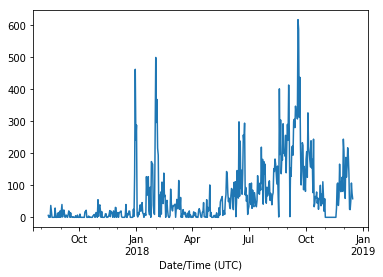

In [15]:
daily_df["Races each day"].plot()
# This represents how frequently the user played the typing game

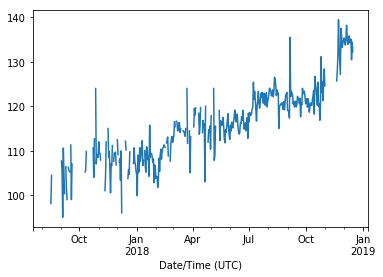

In [12]:
daily_df["Average WPM each day"].plot()
# This is the average typing speed for each day throughout all of the data

In [13]:
sorted_daily_df = daily_df.sort_values("Races each day")
# Sorted by "Races each day" in ascending order,
# so that column is increasing towards the end of the DataFrame

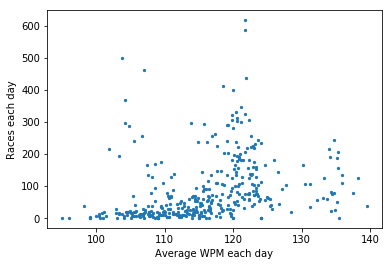

In [14]:
sorted_daily_df.plot.scatter(
    y='Races each day', x='Average WPM each day', s=5
)
# It looks like the more the user types in a day,
# the closer their daily average gets to their overall average.
# Not very remarkable!